<a href="https://colab.research.google.com/github/Vote01/Diplom/blob/main/diplom6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Подключаем гугл диск с данными
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import json
import time
from matplotlib import pyplot
import math
import numpy as np
import pandas as pd
import numpy as np
import pywt
import tensorflow as tf

#from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.regularizers import l1_l2, l1, l2
#from keras import regularizers
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, concatenate, LSTM, Conv2D, Embedding, Reshape, Bidirectional
from keras.models import Sequential
from keras.utils import plot_model

from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, GlobalMaxPooling1D, Dense, Activation, GlobalMaxPooling2D

In [ ]:
size = 2500
DsX = np.empty(0)
DsY =  np.empty((0,5))

In [ ]:
class CSIDataSet(object):
    """docstring"""

    def __init__(self, filename, visibleExamples=0, max_examples=2500):
        """Constructor"""
        self.filename = filename
        self.data = []
        '''Открываем файл с датасетом'''
        with open(filename, "r") as read_file:
           # self.data = json.load(read_file)
            self.data = json.load(read_file)[:max_examples]
        ''' Выводим 3 строки датасета, для наглядности '''
        print("Examples from dataset" + filename)
        for i in range(visibleExamples):
          print(str(i) + ": " + str(self.data[i]))

        ''' Определяем количество данных '''
        self.packetCount = len(self.data)
        print("All count: "+str(self.packetCount))
    def getSetWith(self, count):
      """Метод для возвращения массива с указанным количеством элементов"""
      if count <= len(self.data):
         return self.data[:count]
      else:
         print("Count exceeds the number of elements in the dataset")
         return None

In [ ]:
#амплитуды
file_paths1 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl1/data_class_1_ampl_{i}.json" for i in range(1, 10)]
data_sets1a = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths1]
file_paths2 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl2/data_class_2_ampl_{i}.json" for i in range(1, 10)]
data_sets2a = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths2]
file_paths3 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl3/data_class_3_ampl_{i}.json" for i in range(1, 10)]
data_sets3a = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths3]
file_paths4 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl4/data_class_4_ampl_{i}.json" for i in range(1, 10)]
data_sets4a = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths4]
file_paths5 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl5/data_class_5_ampl_{i}.json" for i in range(1, 10)]
data_sets5a = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths5]

#для удобства перекинула по 9 файлов в рамках одного класса - в отдельную папку

In [ ]:
#фазы

file_paths1 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl1/data_class_1_{i}_ph.json" for i in range(1, 10)]
data_sets1f = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths1]
file_paths2 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl2/data_class_2_{i}_ph.json" for i in range(1, 10)]
data_sets2f = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths2]
file_paths3 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl3/data_class_3_{i}_ph.json" for i in range(1, 10)]
data_sets3f = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths3]
file_paths4 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl4/data_class_4_{i}_ph.json" for i in range(1, 10)]
data_sets4f = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths4]
file_paths5 = [f"//content/drive/MyDrive/Diplom/part2/classes/cl5/data_class_5_{i}_ph.json" for i in range(1, 10)]
data_sets5f = [CSIDataSet(file_path).getSetWith(size) for file_path in file_paths5]

In [ ]:
ds1=np.asarray(data_setsa)
ds1.shape

(9, 2500, 56)

In [ ]:
d1a=np.asarray(data_sets1a)
d2a=np.asarray(data_sets2a)
d3a=np.asarray(data_sets3a)
d4a=np.asarray(data_sets4a)
d5a=np.asarray(data_sets5a)

d1f=np.asarray(data_sets1f)
d2f=np.asarray(data_sets2f)
d3f=np.asarray(data_sets3f)
d4f=np.asarray(data_sets4f)
d5f=np.asarray(data_sets5f)

In [ ]:
d1a=np.reshape(d1a, (2500, 504))
d2a=np.reshape(d2a, (2500, 504))
d3a=np.reshape(d3a, (2500, 504))
d4a=np.reshape(d4a, (2500, 504))
d5a=np.reshape(d5a, (2500, 504))

d1f=np.reshape(d1f, (2500, 504))
d2f=np.reshape(d2f, (2500, 504))
d3f=np.reshape(d3f, (2500, 504))
d4f=np.reshape(d4f, (2500, 504))
d5f=np.reshape(d5f, (2500, 504))

In [ ]:
data_sf=np.concatenate((d1f,d2f,d3f,d4f,d5f))
DsXf=data_sf
DsXf.shape

(12500, 504)

In [ ]:
data_sa=np.concatenate((d1a,d2a,d3a,d4a,d5a))
DsXa=data_sa
DsXa.shape

(12500, 504)

In [ ]:
data_s=np.concatenate((d1,d2,d3,d4,d5))
DsX=data_s
DsX.shape

(12500, 504)

In [ ]:
for i in range(5):
    array = np.zeros((1,5))
    array[0,i] = 1
    for o in range(size):
       DsY = np.append(DsY, array, axis=0)
DsY.shape

(12500, 5)

In [ ]:
#LSTM
def newModel(input_shape):
   model = Sequential()
   model.add(BatchNormalization())
   model.add(GlobalMaxPooling1D())
   model.add(Reshape((1, 504)))
   model.add(LSTM(units=64, return_sequences=False))
   model.add(Dropout(0.2))
   #model.add(Dense(64, kernel_regularizer=l1_l2(l1=0.0001, l2=0.01)))
   model.add(Dense(64, kernel_regularizer=l2(0.001)))
   model.add(Dense(5, activation='softmax'))
   model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   return model

In [ ]:
#BLSTM

from tensorflow.keras.layers import  Attention, Concatenate

def newModel(input_shape):
    model = Sequential()
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Reshape((1, 504)))
    model.add(Bidirectional(LSTM(units=64, return_sequences=False)))
    model.add(Dropout(0.2))
   # model.add(Dense(64, kernel_regularizer=l1_l2(l1=0.0001, l2=0.01)))
    #model.add(Dense(64, kernel_regularizer=l1(0.0001)))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#1D-CNN
def newModel(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=504, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#1D-LSTM
def newModel(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=504, kernel_size=1, padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Reshape((1, 504)))
    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#2D-CNN
def newModel(input_shape):
    model = Sequential()
    model.add(Conv2D(filters=504, kernel_size=1, padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_count = 10
Models = list()
for i in range(model_count):
  model = newModel(input_shape=(None, 504))
  Models.append(model)

In [ ]:
DsX=DsXf

In [ ]:
DsX  = np.fft.fft(DsX)
wavelet = 'db38'
coeffs = pywt.wavedec(DsX, wavelet)

In [ ]:
DsX = tf.expand_dims(DsX, axis=1)
DsX.shape

TensorShape([12500, 1, 504])

In [ ]:
train_loss, val_loss, accuracy = list(), list(), list()
index = 0
st=time.time()
for model in Models:

  index += 1
  start_time = time.time()
  history = model.fit(DsX, DsY, epochs=200, batch_size=500, validation_split=0.1, verbose=0)
  train_loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])
  accuracy.append(history.history['accuracy'])
  print("--- %s-я эпоха пройдена ---" % (index))
  print("--- %s секунд ---" % (time.time() - start_time))
print("--- cуммарно %s секунд ---" % (time.time() - st))

--- 1-я эпоха пройдена ---
--- 383.2581434249878 секунд ---


--- 2-я эпоха пройдена ---
--- 385.83870935440063 секунд ---


--- 3-я эпоха пройдена ---
--- 352.46004343032837 секунд ---


--- 4-я эпоха пройдена ---
--- 383.56113362312317 секунд ---


--- 5-я эпоха пройдена ---
--- 383.75846099853516 секунд ---


--- 6-я эпоха пройдена ---
--- 383.2192220687866 секунд ---


--- 7-я эпоха пройдена ---
--- 383.2150435447693 секунд ---


--- 8-я эпоха пройдена ---
--- 362.1757552623749 секунд ---


--- 9-я эпоха пройдена ---
--- 383.2080600261688 секунд ---


--- 10-я эпоха пройдена ---
--- 383.2447259426117 секунд ---
--- cуммарно 3783.941201686859 секунд ---


In [ ]:
true_list = list()
tp, index = 0, 0
for model in Models:
  index += 1
  pred_DsY = model.predict(DsX)
  for i in range(len(pred_DsY)):
    tp = (tp + 1) if np.argmax(pred_DsY[i]) == np.argmax(DsY[i]) else tp
  true_list.append(tp/len(DsY))
  print(tp/len(DsY))
  tp = 0
print("true_list")
print(true_list)
print("Min:", '%.4f' % min(true_list))
print("Ave:", '%.4f' % (sum(true_list)/len(true_list)))
print("Max:", '%.4f' % max(true_list))

391/391 [==============================] - 1s 3ms/step


0.92544
391/391 [==============================] - 1s 3ms/step


0.92448
391/391 [==============================] - 2s 6ms/step


0.92568
391/391 [==============================] - 3s 6ms/step


0.92488
391/391 [==============================] - 2s 5ms/step


0.92504
391/391 [==============================] - 1s 3ms/step
0.92376


391/391 [==============================] - 1s 3ms/step
0.92704


391/391 [==============================] - 1s 3ms/step
0.92488


391/391 [==============================] - 1s 3ms/step


0.92488
391/391 [==============================] - 2s 6ms/step
0.8436
true_list
[0.92544, 0.92448, 0.92568, 0.92488, 0.92504, 0.92376, 0.92704, 0.92488, 0.92488, 0.8436]
Min: 0.8436
Ave: 0.9170
Max: 0.9270


391/391 [==============================] - 1s 4ms/step


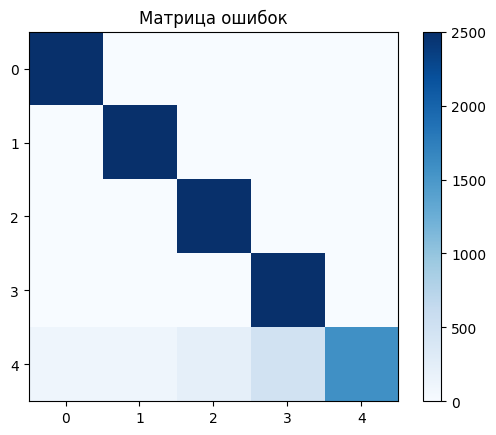

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
pred_DsY = Models[0].predict(DsX)
cm = confusion_matrix(np.argmax(DsY, axis=1), np.argmax(pred_DsY, axis=1))
# Визуализация матрицы ошибок как графика со столбцами
pyplot.imshow(cm, interpolation='nearest', cmap=pyplot.cm.Blues)
pyplot.title('Матрица ошибок')
pyplot.colorbar()

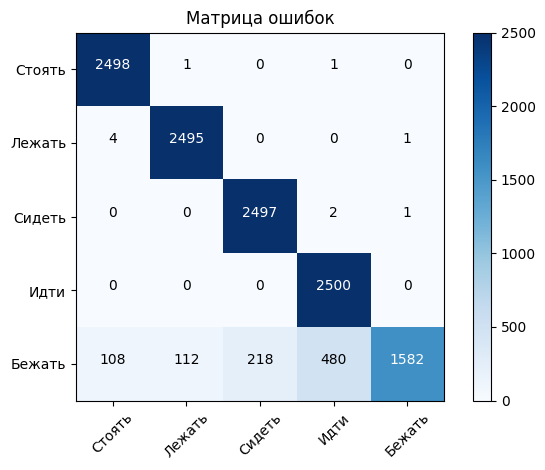

In [ ]:
pyplot.imshow(cm, interpolation='nearest', cmap=pyplot.cm.Blues)
pyplot.title('Матрица ошибок')
pyplot.colorbar()
# Добавление подписей на оси
classes = ['Стоять', 'Лежать', 'Сидеть', 'Идти', 'Бежать']
tick_marks = np.arange(len(classes))
pyplot.xticks(tick_marks, classes, rotation=45)
pyplot.yticks(tick_marks, classes)
# Добавление значений в ячейки матрицы
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    pyplot.text(j, i, format(cm[i, j], 'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
pyplot.tight_layout()
pyplot.show()